# Regression
找出一條最能代表所有觀測資料的線  
你問，未來不做統計，那學這個線幹嘛？ 可以用來預測！  
根據歷史資料，統整出一個方程式，把未知的情況帶進去，就會得到預測的結果

## 如果你對迴歸這東西很模糊，請看看這段
迴歸簡單來說，是從好幾個因素，推斷他們跟結果的```相關性```  
為了方便分析，我們必須將這一堆因素、結果，以及相關性全部```量化```，也就是都用成數學的形式  
透過迴歸，我們可以```用因素們解釋結果```  
### 以下長篇大論，看得累的，可以用聽的
一般來說，我們拿到資料，可以觀察到結果(y)，以及因素(x)  
而B<sub>0</sub>和B<sub>1</sub>這兩個將結果與因素連結在一起的係數/常數，是沒有人知道、而且不是隨機的數字（下標不同，數字可能不同）  
而ε是error，我喜歡叫它誤差，隨機而且不能觀測
#### 迴歸假設：讓你判斷迴歸模型適不適合本次資料分析的東西
y = B<sub>0</sub> +B<sub>1</sub>x + ε  
而針對上述變數的假設如下：
- x、y都是常態分布
- ε的平均是0，且為常態分布
- Cov(ε,x) = 0 <-x跟ε互相獨立  
最後兩項是**高斯-馬可夫定理 (Gauss-Markov Theorem)** 的條件，有興趣可以自己去翻一下  

但在統計學上，我們上述的東西，都要用估計的，所以你也會看到這種寫法：  
$\hat{y}$ = b<sub>0</sub> + b<sub>1</sub>x + e  
#### 估計b的方法：隨著迴歸假設符合的情況，會用不同的方式估計b
主流方法有兩種：
- lease square error(LSE): 能使歷史資料的y跟估計y，兩者差的平方最小化的b組合，即是我們估計的b  
- lease absolute error(LAE): 能使歷史資料的y跟估計y，兩者差的絕對值最小的b組合，即是我們估計的b

### 總結
我們這次只會用到LSE，因為numpy.random.randn正好可以符合高斯定理，用LSE基本上就是最佳估計了  
*（欸？為甚麼符合高斯定理？快去翻翻numpy的講義，裏頭有提到randn的生成）*  
至於以後實務上的迴歸模型調整，會用到大量的統計學領域知識，這邊就不細講，有興趣的同學可以修統計學、數理統計學、迴歸分析等

### 沒有歷史資料可以練習？我們自己生！

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#想取名的，可以自己在import的module後面，用as自己命名

(array([ 4.,  5.,  7., 21., 12., 14., 22., 10.,  3.,  2.]),
 array([-21.85183986, -17.16639822, -12.48095658,  -7.79551493,
         -3.11007329,   1.57536835,   6.26081   ,  10.94625164,
         15.63169328,  20.31713492,  25.00257657]),
 <a list of 10 Patch objects>)

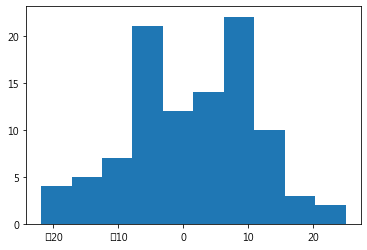

In [80]:
#快速生成資料！
X = np.random.randn(100)*10
#看看生出來的資料長怎樣
plt.hist(X) #因為資料很少，但基本上是符合常態分布的

In [81]:
#透過上面的X，我們生成一個結果Y
Y = 2.3*X + 20 #數字自己隨便玩，這邊先練線性，盡量不要用一些奇怪的手段（指數、分母）
#看看Y
Y

array([ 31.97010161,  47.16121841,   8.42606394, -10.04927807,
        39.39566862,  56.93908562,  10.67565066,  29.85988099,
        -6.74195776,  30.54479394,  54.16420069,   7.19797439,
        27.05737363,  10.18286201,  60.62406146,  36.94946568,
         1.40645236, -29.90544328,   3.83802113,  47.48427498,
        44.84992341,  20.76533763,  25.39138942, -30.25923168,
        25.56947871,  24.06024088,  12.07504704,  15.3127448 ,
        43.45652035,  40.6383605 ,  40.9834524 ,  40.18169049,
        47.18217432,  41.56308953,  35.5228455 ,   5.54467199,
       -10.495619  ,  46.73511539,   5.71455889,  36.7450145 ,
        38.41867998,  63.86674419,  10.85315772,  15.75587115,
       -13.62595279,  17.13264861,  47.63644577,  -3.01958512,
        29.95295374,   4.27201256, -21.24758284,  49.11267566,
        32.71650231,  27.44179204, -12.94078133,  77.5059261 ,
       -21.20242255,  19.32328672,   9.17126517,  -6.29990005,
        37.08756908,  -7.45481129,  14.47536796,  14.72

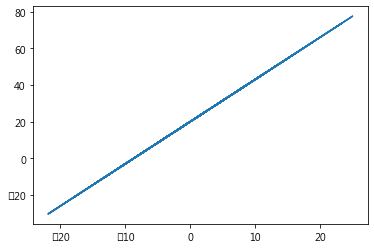

In [82]:
#既然是線性，我們畫看看他是不是線性
plt.plot(X,Y)
#如果你畫的不是直線，一定是你對於一元一次式有什麼誤解，快去查查甚麼是線性

In [83]:
#如果你真實世界蒐集的資料都長這樣，那你一定跟我活在不同時空
#賦予他一些"真實性"、"不確定性"，所以我們要加一點亂源
noise = np.random.randn(100) #每一個Y，隨機給他一個數字，讓他不完全落在線上
#大多數程式的random，都是從-1~1之間隨機生成數字
#看看noise長怎樣
noise

array([ 0.59670989, -1.43375273, -1.11906324, -1.34435252,  0.24886943,
        1.76698592,  1.12590632,  0.77036012, -0.43817781,  0.82451796,
       -0.06139739,  0.28982473, -1.15383787, -0.34287476, -0.99313545,
        0.35339962,  0.09008598,  0.51854533,  0.79403339, -0.56186992,
        0.79656845, -0.05447119, -0.03174697, -0.23827584,  0.48064514,
       -0.65514165,  0.21506154, -0.53020926,  0.57199093,  0.43706241,
       -0.55186376,  0.53411609, -0.11449768, -0.33361069, -0.92645316,
       -1.09615362,  0.27842697,  0.44366348,  1.23807994,  0.36719144,
        0.05619552,  0.10626559, -0.26936186,  0.90787319, -0.02278833,
        0.83487942,  2.55640268,  1.00228302,  0.42792394, -0.51001986,
        0.40205989, -1.74741763,  0.10339496,  0.19239454,  2.47012929,
       -1.22319331, -0.49413057, -0.37132642,  1.00687828, -0.38915338,
       -1.00967602,  2.08632539, -1.02297982, -0.3632165 ,  1.20249517,
       -0.15052905, -0.75204343,  1.70337575,  0.37766115,  0.95

In [84]:
Y_noise = 2.3*X + 20 + 15*noise 
#記得，X的係數跟常數要跟Y的長一樣，不然就不是"加了一點亂數"，而是根本不同關係了

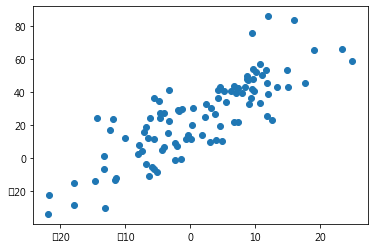

In [85]:
plt.scatter(X,Y_noise)
#回憶一下，為什麼這邊用scatter，上面用plot

#### 現實的數據就是長這樣，散亂，看起來又好像有一點趨勢
#### 有時候他看起來不會像是一條左下到右上的線

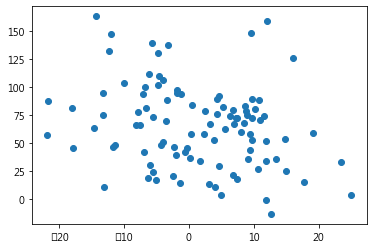

In [86]:
Y_noise = -0.3*X + 60 + 40*noise
plt.scatter(X,Y_noise)

### 如果剛剛對X亂來，讓他跟Y看起來不是一條線會怎樣？

In [87]:
#如果你嫌原本的X過氣了，想換新的，來，我們再複習一次
X = np.random.randn(100)*5
X

array([ -2.91964457,  -8.92815408,   0.39115018,   2.80234234,
        -2.29262773,  -7.11489022,   1.02308863,  -3.29125481,
         1.18394042,  -5.85399395,  -0.14604135,   4.48640166,
         4.58820961,   7.3358695 ,  -2.44855534, -11.65661412,
         6.73312077,   3.35852756,   5.68837468,  -3.2744938 ,
         4.32610847,   3.09277402,  -7.13532632,  -0.40314653,
         2.12470354,  -0.51796845,   3.69210669,  -8.52607134,
         1.08889166,   7.4505767 ,   8.90493393,   1.81290737,
         3.19400103,   1.61870887,  -2.00862212,   7.37043125,
         5.31872409,   1.84864339,   1.65150548,  -8.0493286 ,
         1.61366011,  -2.95502179,   6.48698616,   2.24761356,
        -1.69803305,  -4.74406509,  -4.97670411,  -0.82766843,
        11.14595556,  -5.633415  ,  -2.08096174,   5.75159612,
        -0.49718576,  -5.05479896,   1.73294598,  -4.17359952,
        -9.66089691,  -1.44013949,   1.68508952,   2.59519128,
        -6.60916812,  -5.13177818,   6.37834033,   4.84

In [88]:
np.square(X) #如果你忘記**了，np也有平方喔

array([8.52432441e+00, 7.97119353e+01, 1.52998466e-01, 7.85312259e+00,
       5.25614191e+00, 5.06216628e+01, 1.04671035e+00, 1.08323583e+01,
       1.40171491e+00, 3.42692451e+01, 2.13280765e-02, 2.01277999e+01,
       2.10516674e+01, 5.38149813e+01, 5.99542325e+00, 1.35876653e+02,
       4.53349153e+01, 1.12797074e+01, 3.23576065e+01, 1.07223097e+01,
       1.87152145e+01, 9.56525116e+00, 5.09128816e+01, 1.62527127e-01,
       4.51436514e+00, 2.68291314e-01, 1.36316518e+01, 7.26938925e+01,
       1.18568505e+00, 5.55110932e+01, 7.92978483e+01, 3.28663312e+00,
       1.02016426e+01, 2.62021842e+00, 4.03456280e+00, 5.43232568e+01,
       2.82888259e+01, 3.41748237e+00, 2.72747036e+00, 6.47916908e+01,
       2.60389894e+00, 8.73215380e+00, 4.20809894e+01, 5.05176670e+00,
       2.88331625e+00, 2.25061536e+01, 2.47675838e+01, 6.85035024e-01,
       1.24232325e+02, 3.17353645e+01, 4.33040174e+00, 3.30808580e+01,
       2.47193678e-01, 2.55509926e+01, 3.00310176e+00, 1.74189329e+01,
      

In [89]:
X**2 #還記得這是什麼嗎？

array([8.52432441e+00, 7.97119353e+01, 1.52998466e-01, 7.85312259e+00,
       5.25614191e+00, 5.06216628e+01, 1.04671035e+00, 1.08323583e+01,
       1.40171491e+00, 3.42692451e+01, 2.13280765e-02, 2.01277999e+01,
       2.10516674e+01, 5.38149813e+01, 5.99542325e+00, 1.35876653e+02,
       4.53349153e+01, 1.12797074e+01, 3.23576065e+01, 1.07223097e+01,
       1.87152145e+01, 9.56525116e+00, 5.09128816e+01, 1.62527127e-01,
       4.51436514e+00, 2.68291314e-01, 1.36316518e+01, 7.26938925e+01,
       1.18568505e+00, 5.55110932e+01, 7.92978483e+01, 3.28663312e+00,
       1.02016426e+01, 2.62021842e+00, 4.03456280e+00, 5.43232568e+01,
       2.82888259e+01, 3.41748237e+00, 2.72747036e+00, 6.47916908e+01,
       2.60389894e+00, 8.73215380e+00, 4.20809894e+01, 5.05176670e+00,
       2.88331625e+00, 2.25061536e+01, 2.47675838e+01, 6.85035024e-01,
       1.24232325e+02, 3.17353645e+01, 4.33040174e+00, 3.30808580e+01,
       2.47193678e-01, 2.55509926e+01, 3.00310176e+00, 1.74189329e+01,
      

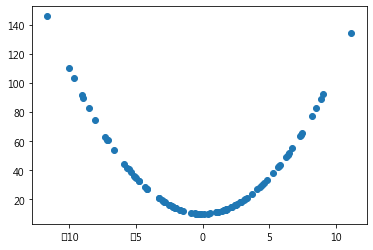

In [90]:
#一樣，我們來想想X跟Y的關係
Y = np.square(X) + 10
plt.scatter(X,Y)

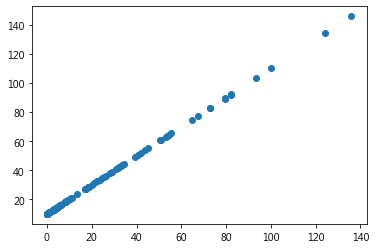

In [91]:
#那如果是X**2跟Y的關係呢
plt.scatter(X**2,Y)

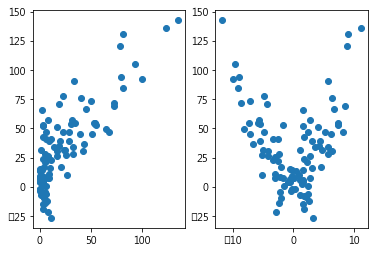

In [92]:
#看樣子我們如果平方，他就不是線性的了，但是平方的X跟Y還是有線性關係
#如果我們加上noise呢？
Y_noise = np.square(X) + 10 + 20*np.random.randn(100)

fig = plt.figure()
ax_0 = fig.add_subplot(121)
ax_1 = fig.add_subplot(122)
ax_0.scatter(X**2,Y_noise)
ax_1.scatter(X,Y_noise)

### 小小觀念補充
有人可能覺得，剛剛的U型線，看起來也是**線**，為甚麼他**不是線性**
在數學上，**連成一條線**的，是**連續**，而**線性專指直線**

## 試試看自己弄一筆假資料
請注意以下條件：
- ```線性```：x不可以有任何指數變化、x可以有係數、可以有常數等
- ```自然/亂源/隨機性```：請給他一點noise，但注意noise的比重不要太重，不然你的資料的隨機性會太高，regression的結果會不太好看

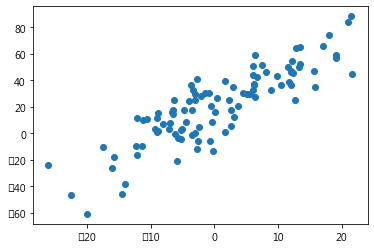

In [93]:
X = np.random.randn(100)*10
Y = 2.3*X + 20
noise = np.random.randn(100)
Y_noise = 2.3*X + 20 + 15*noise
plt.scatter(X,Y_noise)

In [94]:
#迴歸模型
import statsmodels.api as sm

In [95]:
x_constant = sm.add_constant(X)
x_constant

array([[  1.        ,  -7.09787184],
       [  1.        ,  -8.88741606],
       [  1.        ,  -6.35891026],
       [  1.        ,  12.40697518],
       [  1.        ,  -5.10887054],
       [  1.        ,  -9.25879125],
       [  1.        ,  -3.07415222],
       [  1.        ,  -5.27977527],
       [  1.        ,  -8.03208064],
       [  1.        , -19.95513567],
       [  1.        ,  -0.8537405 ],
       [  1.        ,   6.37127612],
       [  1.        ,  -2.47239186],
       [  1.        ,   3.73011044],
       [  1.        ,   6.0641989 ],
       [  1.        ,  -9.00219468],
       [  1.        ,  -6.64820229],
       [  1.        ,  -5.20848018],
       [  1.        ,  -3.64332223],
       [  1.        ,  -3.92190114],
       [  1.        ,  12.58909423],
       [  1.        ,  -3.27030887],
       [  1.        ,  -2.48312933],
       [  1.        ,  13.51831751],
       [  1.        ,  -2.68787266],
       [  1.        ,  13.24857838],
       [  1.        ,  -1.40144967],
 

In [96]:
#Use LSE to estimate b
results = sm.OLS(Y_noise,x_constant).fit()
print(results.summary()) #這邊建議用print，比較方便看

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     288.5
Date:                Sun, 05 Sep 2021   Prob (F-statistic):           5.87e-31
Time:                        17:44:53   Log-Likelihood:                -405.88
No. Observations:                 100   AIC:                             815.8
Df Residuals:                      98   BIC:                             821.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.7534      1.417     13.937      0.0

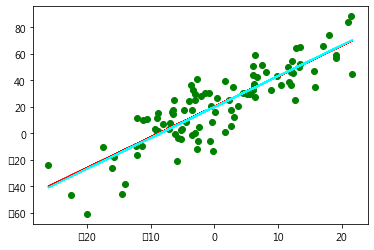

In [97]:
y_fitted = results.fittedvalues
plt.scatter(X, Y_noise,color='green') #我們生成的自然資料
plt.plot(X,Y,color='r') #我們預先設計的X、Y關係
plt.plot(X,y_fitted,color='cyan') #透過LSE迴歸模型，在自然資料中找到的X、Y關係

In [98]:
#但我們實際操作，沒人會告訴你那條紅色的線
results.rsquared #告訴你R**2的值，越大代表這一個X越能夠解釋Y

0.7464189272741721

In [99]:
results.params #告訴你那條藍色的線aka透過LSE估計出來的線，方程式的係數是多少
#而這些係數的排列為[常數,第一個因素,第二個因素,第三個因素,...,第n個因素]進行排列

array([19.7533736 ,  2.33224152])

### 小測驗
試試看生成一個Y跟X<sup>2</sup>有關聯的自然資料，然後生成Y跟X透過LSE迴歸出來的summary，以及Y跟X<sup>2</sup>透過LSE迴歸出來的summary
如果你還記得pandas的話，生成圖表，比較Y跟X以及Y跟X<sup>2</sup>的差別

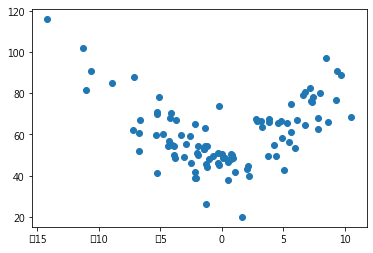

In [100]:
X = np.random.randn(100)*5
Y = 0.4*(X**2) + 50
noise = np.random.randn(100)*10
Y_noise = Y + noise
plt.scatter(X,Y_noise)

In [101]:
x_constant = sm.add_constant(X)
x_results = sm.OLS(Y_noise,x_constant).fit()
print(x_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.03060
Date:                Sun, 05 Sep 2021   Prob (F-statistic):              0.862
Time:                        17:44:54   Log-Likelihood:                -419.15
No. Observations:                 100   AIC:                             842.3
Df Residuals:                      98   BIC:                             847.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.4359      1.619     37.339      0.0

In [102]:
x_square_constant = sm.add_constant(X**2)
x_square_results = sm.OLS(Y_noise,x_square_constant).fit()
print(x_square_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     154.6
Date:                Sun, 05 Sep 2021   Prob (F-statistic):           7.28e-22
Time:                        17:44:54   Log-Likelihood:                -371.83
No. Observations:                 100   AIC:                             747.7
Df Residuals:                      98   BIC:                             752.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.4344      1.290     39.111      0.0

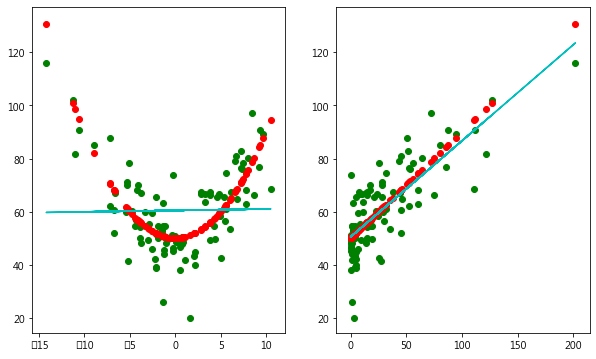

In [103]:
fig = plt.figure(figsize=(10, 6))
ax_0 = fig.add_subplot(121)
ax_1 = fig.add_subplot(122)

ax_0.scatter(X,Y_noise,color='g')
ax_0.scatter(X,Y,color='r')
ax_0.plot(X,x_results.fittedvalues,color='c')

ax_1.scatter(X**2,Y_noise,color='g')
ax_1.scatter(X**2,Y,color='r')
ax_1.plot(X**2,x_square_results.fittedvalues,color='c')

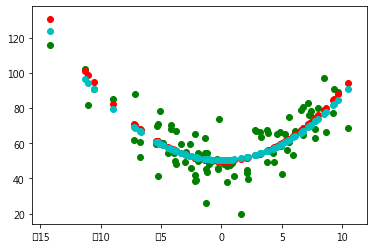

In [104]:
plt.scatter(X,Y_noise,color='g')
plt.scatter(X,Y,color='r')
plt.scatter(X,x_square_results.fittedvalues,color='c')

## 實際應用嘗試

In [106]:
df = pd.read_csv("fredgraph.csv")
df

,DATE,FEDFUNDS,GDPPOT,GDPC1,SP500,GPDIC1,WEI
0,2012-10-01,0.16,16850.14906,16239.138,1426.19,2624.905,2.10
1,2013-01-01,0.14,16921.81411,16382.964,1569.19,2722.778,1.70
2,2013-04-01,0.09,16994.85865,16403.180,1606.28,2753.237,2.32
3,2013-07-01,0.08,17068.55201,16531.685,1681.55,2859.751,2.30
4,2013-10-01,0.09,17143.44149,16663.649,1848.36,2870.127,2.49
5,2014-01-01,0.08,17219.32626,16616.540,1872.34,2838.287,2.56
6,2014-04-01,0.10,17296.15209,16841.475,1960.23,2958.068,2.08
7,2014-07-01,0.09,17374.23266,17047.098,1972.29,3018.582,2.53
8,2014-10-01,0.12,17453.03407,17143.038,2058.90,3021.857,3.22
9,2015-01-01,0.11,17532.11313,17305.752,2067.89,3127.274,2.42


In [107]:
df.corr()

,FEDFUNDS,GDPPOT,GDPC1,SP500,GPDIC1,WEI
FEDFUNDS,1.000000,0.560775,0.767813,0.509229,0.719878,0.213124
GDPPOT,0.560775,1.000000,0.901582,0.954605,0.824464,-0.530864
GDPC1,0.767813,0.901582,1.000000,0.848714,0.957177,-0.196146
SP500,0.509229,0.954605,0.848714,1.000000,0.814506,-0.416973
GPDIC1,0.719878,0.824464,0.957177,0.814506,1.000000,-0.073421
WEI,0.213124,-0.530864,-0.196146,-0.416973,-0.073421,1.000000


### 相關係數（correlation coefficient）
越接近0，越不像線性，絕對值越接近1，越像線性  
正數負數代表正相關與負相關，某一方上升時隨之上升，抑或是某一方上升時隨之下降

In [108]:
#除了Date是日期以外，這邊都是一些投資的相關參考利率或指數
df.columns

Index(['DATE', 'FEDFUNDS', 'GDPPOT', 'GDPC1', 'SP500', 'GPDIC1', 'WEI'], dtype='object')

In [109]:
#我們這次主要預測SP500的數值，目標是在知道FEDFUNDS, GDPPOT, GDPC1,GPDIC1, WEI這些經濟指標的情況下，預估能夠代表股票趨勢的SP500數值
#被解釋: y
y = df["SP500"]
#能夠解釋y的因素: x1,x2,x3,x4,x5
x1 = df["FEDFUNDS"]
x2 = df["GDPPOT"]
x3 = df["GDPC1"]
x4 = df["GPDIC1"]
x5 = df["WEI"]

### 迴歸的第一步驟，絕對不是先讓他生成一條迴歸線
我知道你們已經假設這五個東西，跟SP500一定有一定程度上的線性關係了  
但請你們，先把這個想法放到一邊  
#### 我們並不是神明，不知道這群數字是不是真的能夠解釋y
如果其實x<sub>1</sub><sup>2</sup>才能夠解釋y呢？  
如果x<sub>2</sub>跟y一點關係都沒有呢？  
你必須要有強大的**領域知識**，才能夠評估哪些因素才能夠解釋y  
比方說，你的身高，跟你的父母有關係，但跟你數學有沒有100分，相關性可能就低了  
某一個指數，就是透過參考某一股票的變化而計算出來的，相關性可能就會高上許多  
*啊我就第一天接觸這個領域，你要我去哪裡生領域知識？*  
~~google阿~~...咳，或許你可以嘗試，把他的圖畫出來

### 小測驗
把y跟x<sub>1</sub>、y跟x<sub>2</sub>、y跟x<sub>3</sub>、y跟x<sub>4</sub>、y跟x<sub>5</sub>的分布圖，分別畫出來

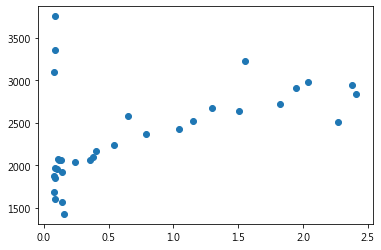

In [110]:
plt.scatter(x1,y)

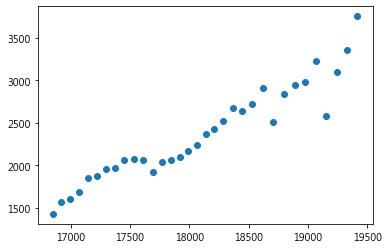

In [111]:
plt.scatter(x2,y)

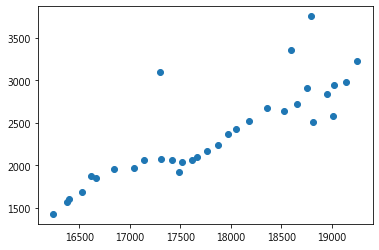

In [112]:
plt.scatter(x3,y)

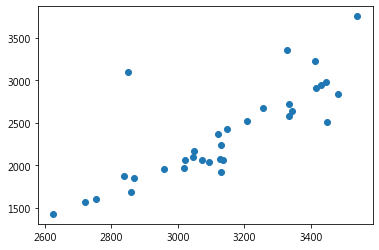

In [113]:
plt.scatter(x4,y)

C:\Users\28743\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\28743\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


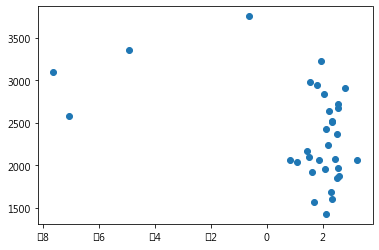

In [114]:
plt.scatter(x5,y)

### 既然有五個因素，不如我們都加進去看看

In [115]:
X1 = np.column_stack((x1,x2,x3,x4,x5))
X1_constant = sm.add_constant(X1)
results1 = sm.OLS(y,X1_constant).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     151.0
Date:                Sun, 05 Sep 2021   Prob (F-statistic):           7.48e-19
Time:                        17:44:55   Log-Likelihood:                -199.58
No. Observations:                  33   AIC:                             411.2
Df Residuals:                      27   BIC:                             420.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.375e+04   1276.102    -10.773      0.0

### Warnings?
*This might indicate that there are strong multicollinearity or other numerical problems.*  
在使用迴歸分析的時候，有幾點是你要注意的：  
- 模型假設：要你畫圖的原因之一。不是一定y=$\beta$<sub>0</sub> + $\beta$<sub>1</sub>x + ε，而是y=$\beta$<sub>0</sub> + $\beta$<sub>1</sub>x<sup>2</sup> + ε
- 多重共線性(multicollinearity)：統計學上會以Cov(x<sub>i</sub>,x<sub>j</sub>)表示  
  白話來說，有兩個因素彼此有一定關聯性
- 因素不足以完全解釋y：基因、飲食、作息，以上都會影響身高，單用飲食去解釋身高，預測當然不夠精準

In [116]:
y1_fitted = results1.fittedvalues
e = y-y1_fitted #實際上的y跟我們預測出來的y之間的誤差

print(np.mean(e))
print(np.var(e))

-3.638874521570732e-10
10483.926938675382


In [117]:
#x2, x3, x4基本上都是GDP相關的東西，彼此的相關性很高，不如我們把x4拿掉看看
X2 = np.column_stack((x1,x2,x3,x5))
X2_constant = sm.add_constant(X2)
results2 = sm.OLS(y,X2_constant).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     175.9
Date:                Sun, 05 Sep 2021   Prob (F-statistic):           2.10e-19
Time:                        17:44:55   Log-Likelihood:                -201.28
No. Observations:                  33   AIC:                             412.6
Df Residuals:                      28   BIC:                             420.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.517e+04   1000.385    -15.166      0.0

In [118]:
y2_fitted = results2.fittedvalues
e = y-y2_fitted #實際上的y跟我們預測出來的y之間的誤差

print(np.mean(e))
print(np.var(e))
#在排除掉x4之後，誤差變小了

1.7754645699769203e-09
11621.803656785654


In [119]:
#今天如果資料比較少，會發生什麼事情?
X3 = np.column_stack((x1,x2))
X3_constant = sm.add_constant(X3)
results3 = sm.OLS(y,X3_constant).fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     156.0
Date:                Sun, 05 Sep 2021   Prob (F-statistic):           1.41e-16
Time:                        17:44:55   Log-Likelihood:                -214.96
No. Observations:                  33   AIC:                             435.9
Df Residuals:                      30   BIC:                             440.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.044e+04    840.672    -12.417      0.0

In [120]:
y3_fitted = results3.fittedvalues
e = y-y3_fitted #實際上的y跟我們預測出來的y之間的誤差

print(np.mean(e))
print(np.var(e))
#誤差明顯上升，R-squared、Adj. R-squared都下降了，但因為x1, x2對於預測y來說有足夠影響力，所以並沒有下降太多

-8.201747429363119e-09
26637.077713571798


### 小測驗
試著只用x4、x5去預測y，並觀察誤差、R-squared、Adj. R-squared的變化

In [121]:
#今天如果資料比較少，會發生什麼事情?
X4 = np.column_stack((x4,x5))
X4_constant = sm.add_constant(X4)
results4 = sm.OLS(y,X4_constant).fit()
print(results4.summary())
y4_fitted = results4.fittedvalues
e = y-y4_fitted #實際上的y跟我們預測出來的y之間的誤差
print('-'*50)
print('mean of error: '+ str(np.mean(e)))
print('variance of error: ' + str(np.var(e)))

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     57.01
Date:                Sun, 05 Sep 2021   Prob (F-statistic):           6.04e-11
Time:                        17:44:55   Log-Likelihood:                -229.23
No. Observations:                  33   AIC:                             464.5
Df Residuals:                      30   BIC:                             468.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3257.3614    610.406     -5.336      0.0